In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

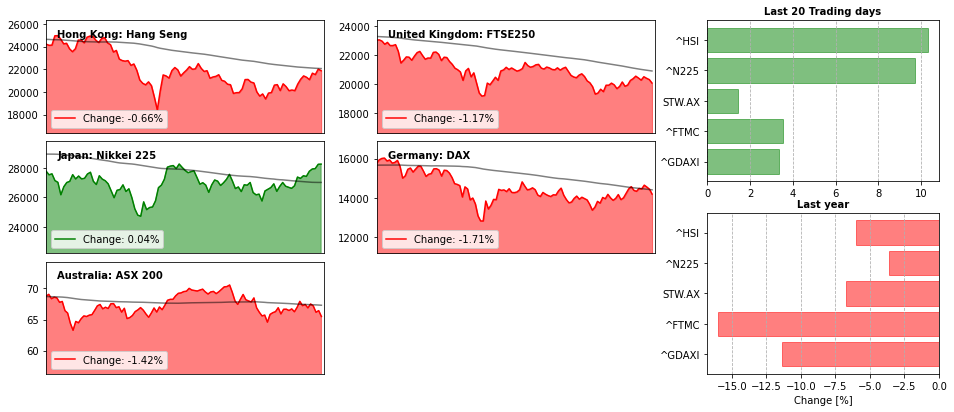

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 10-06-2022 at 08:12:54


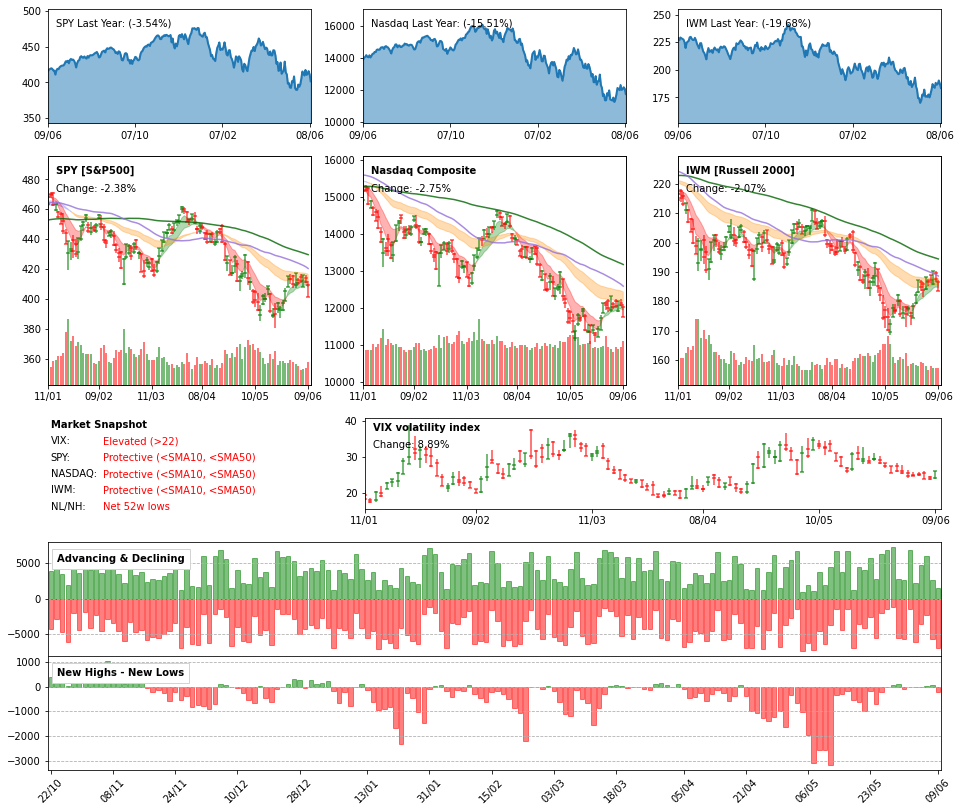

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

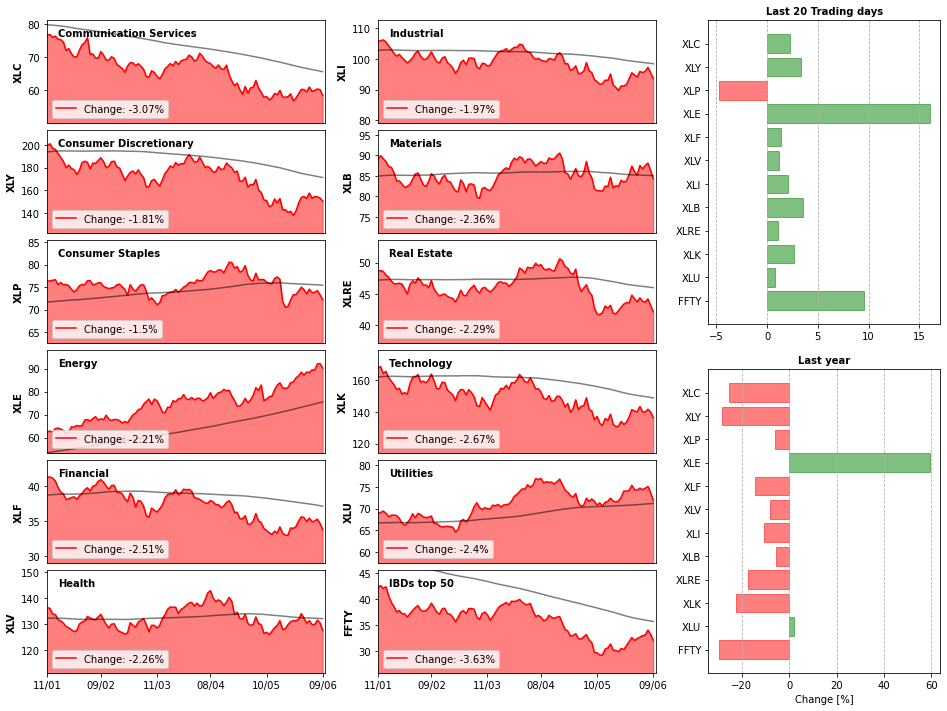

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Solar,0.55,28.81,-18.97,-0.52,0.83,-2.15,0
Oil & Gas E&P,1.54,22.42,65.60,92.40,0.95,-2.24,2
Oil & Gas Drilling,-0.31,21.25,88.16,62.83,0.72,-5.05,0
Oil & Gas Refining & Marketing,5.54,21.16,59.46,38.46,1.06,-0.97,2
Oil & Gas Equipment & Services,1.21,20.47,51.39,34.25,0.84,-3.09,0
Uranium,0.96,20.03,0.72,12.02,0.80,-5.52,-4
Electronic Gaming & Multimedia,-2.72,16.89,-46.22,-52.61,0.97,-4.39,1
Other Industrial Metals & Mining,-4.18,15.43,21.09,-8.59,0.69,-3.41,1
Real Estate Services,-1.25,15.15,-31.54,-58.31,0.68,-5.46,-2
Thermal Coal,-1.10,14.72,114.26,176.44,0.63,-3.35,0


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Communication Equipment,-3.82,-4.47,-21.15,-19.91,0.81,-1.98,-6
Trucking,-4.87,-4.75,-31.55,-12.97,0.76,-1.23,2
Medical Care Facilities,-4.60,-4.75,-17.66,-29.10,0.74,-2.54,-3
Advertising Agencies,-6.19,-5.35,-25.37,-30.98,0.64,-3.03,-1
Packaged Foods,-1.18,-5.86,0.38,-12.06,1.79,-1.38,4
Food Distribution,-3.29,-6.24,4.13,-1.27,0.81,-3.40,-44
Medical Distribution,-2.70,-6.53,20.56,20.63,0.75,-1.41,0
Confectioners,-1.88,-6.71,4.47,2.97,0.83,-1.64,0
Consumer Electronics,-5.63,-7.00,-19.20,11.20,0.70,-3.57,-11
Discount Stores,-3.24,-14.03,-12.44,-3.92,0.91,-0.26,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Home Improvement Retail,-1.79,2.39,-26.73,-2.84,0.81,0.78,0.631800
Luxury Goods,0.37,11.90,-30.18,-26.54,1.12,0.45,0.504000
Auto & Truck Dealerships,1.45,8.33,-13.45,-7.05,0.69,-0.08,-0.055200
Shell Companies,0.07,0.34,-3.38,0.11,1.08,-0.06,-0.064800
Residential Construction,-3.05,4.06,-29.57,-14.97,0.78,-0.10,-0.078000
Discount Stores,-3.24,-14.03,-12.44,-3.92,0.91,-0.26,-0.236600
Real Estate - Development,-5.00,-1.27,-12.02,-32.15,0.27,-1.36,-0.367200
Recreational Vehicles,-2.04,-1.50,-26.96,-30.85,0.92,-0.45,-0.414000
Consulting Services,-3.42,0.05,-21.01,-5.15,0.38,-1.22,-0.463600
Department Stores,4.43,4.69,1.38,4.47,0.90,-0.61,-0.549000


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0